# FOCI-OpenIFS grids

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cmocean
import cartopy.util as cutil

In [23]:
from importlib import reload
foci_functions = reload(foci_functions)

## Read OASIS grids

In [24]:
oasis_mesh = foci_functions.read_oasis_mesh('FOCI_GJK029')

In [25]:
oasis_mesh

<xarray.Dataset>
Dimensions:               (y_A096: 1, x_A096: 40320, crn_A096: 4, y_L096: 1, x_L096: 40320, crn_L096: 4, y_R096: 1, x_R096: 40320, crn_R096: 4, y_opat: 511, x_opat: 722, y_opac: 511, x_opac: 722, y_rnfa: 256, x_rnfa: 512, crn_rnfa: 4, y_rnfo: 511, x_rnfo: 722, y_opaa: 511, x_opaa: 722, y_rnfs: 256, x_rnfs: 512, y_rnfm: 256, x_rnfm: 512)
Dimensions without coordinates: y_A096, x_A096, crn_A096, y_L096, x_L096, crn_L096, y_R096, x_R096, crn_R096, y_opat, x_opat, y_opac, x_opac, y_rnfa, x_rnfa, crn_rnfa, y_rnfo, x_rnfo, y_opaa, x_opaa, y_rnfs, x_rnfs, y_rnfm, x_rnfm
Data variables: (12/52)
    A096.lon              (y_A096, x_A096) float64 ...
    A096.lat              (y_A096, x_A096) float64 ...
    A096.clo              (crn_A096, y_A096, x_A096) float64 ...
    A096.cla              (crn_A096, y_A096, x_A096) float64 ...
    L096.lon              (y_L096, x_L096) float64 ...
    L096.lat              (y_L096, x_L096) float64 ...
    ...                    ...
    opac.srf              (y_opac, x_opac) float64 ...
    rnfa.srf              (y_rnfa, x_rnfa) float64 ...
    rnfo.srf              (y_rnfo, x_rnfo) float64 ...
    opaa.srf              (y_opaa, x_opaa) float64 ...
    rnfs.srf              (y_rnfs, x_rnfs) float64 ...
    rnfm.srf              (y_rnfm, x_rnfm) float64 ...

In [15]:
#oasis_grids = xr.open_dataset('/scratch/projects/shk00018/foci_input2/oasis3_openifs43r3-tco95_orca05/grids.nc')
#oasis_masks = xr.open_dataset('/scratch/projects/shk00018/foci_input2/oasis3_openifs43r3-tco95_orca05/masks.nc')
#oasis_areas = xr.open_dataset('/scratch/projects/shk00018/foci_input2/oasis3_openifs43r3-tco95_orca05/areas.nc')

<xarray.DataArray 'rnfs.msk' (y_rnfs: 256, x_rnfs: 512)>
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)
Dimensions without coordinates: y_rnfs, x_rnfs

## Plot runoff masks

/gxfs_home/geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


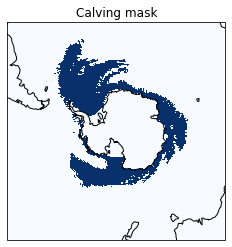

In [68]:
prj = ccrs.PlateCarree()
prj = ccrs.SouthPolarStereo()
fig1, axs1 = plt.subplots(1, 1, figsize=(4,4),
                          subplot_kw={'projection':prj})
cmap = plt.cm.Blues_r

lon = oasis_mesh['rnfs.lon'][0,:].data
lat = oasis_mesh['rnfs.lat'][:,0].data
z   = oasis_mesh['rnfs.msk'].data

# Calving mask lons are not equally spaced. 
# So lets make a new lon array
# This leads to an error of size 0.01 degrees or so
lon2 = (np.arange(0,lon.shape[0]) + 1) * (lon[1]-lon[0]) 
cyclic_z, cyclic_lons = cutil.add_cyclic_point(z, coord=lon2)

axs1.pcolormesh(cyclic_lons, lat, cyclic_z, 
                vmin=0, vmax=1,
                cmap=cmap,
                transform=ccrs.PlateCarree(),
                rasterized=True)

axs1.set_title('Calving mask')

axs1.coastlines(color='k')

axs1.set_extent([-180,180,-90,-40],ccrs.PlateCarree())

fig1.tight_layout()
fig1.savefig('plots/calving_mask.pdf',format='pdf',dpi=150)

## Read OpenIFS topo and NEMO bathy

In [65]:
lsmoro = xr.open_dataset('/scratch/projects/shk00018/foci_input2/openifs_cy43_tco95/95_4/lsmoro.nc')

bathy = xr.open_dataset('/scratch/projects/shk00018/foci_input2/nemo_orca05/input/ORCA05/bathy_meter.nc')

/home/shkjocke/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/shkjocke/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/shkjocke/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)

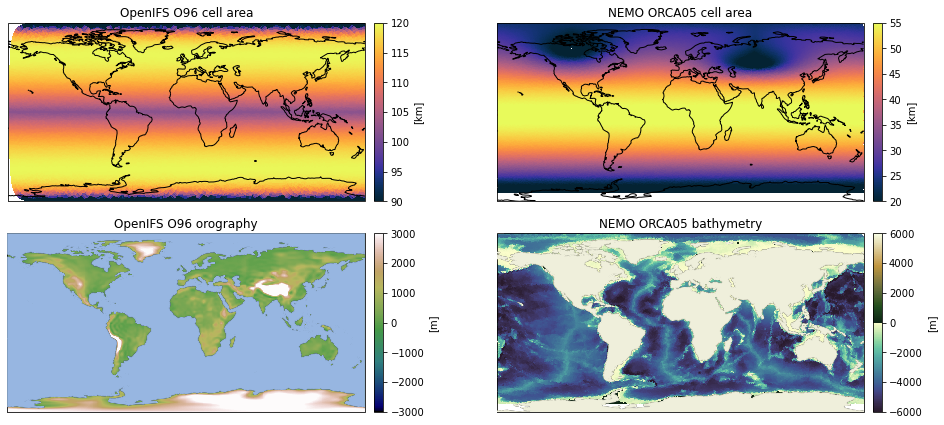

In [79]:
fig1, axs1 = plt.subplots(2, 2, figsize=(14,6),
                          subplot_kw={'projection':ccrs.PlateCarree()})
ax1 = axs1.flat

if 1:
    vmin, vmax, cmap = 90, 120, cmocean.cm.thermal
    z = np.sqrt(oasis_areas['A096.srf'].data.flatten()) * 1e-3 #[km]
    cf = ax1[0].tripcolor(oasis_grids['A096.lon'].data.flatten(), 
                          oasis_grids['A096.lat'].data.flatten(), 
                          z,
                          vmin=vmin, vmax=vmax, cmap=cmap, 
                          rasterized=True,
                          transform=ccrs.PlateCarree())
    cb = plt.colorbar(cf, ax=ax1[0], pad=0.02)
    cb.set_label('[km]')
    ax1[0].set_title('OpenIFS O96 cell area')

if 1:
    vmin, vmax, cmap = 20, 55, cmocean.cm.thermal
    z = np.sqrt(oasis_areas['opat.srf'].data.flatten()) * 1e-3 #[km]
    cf = ax1[1].tripcolor(oasis_grids['opat.lon'].data.flatten(), 
                          oasis_grids['opat.lat'].data.flatten(), 
                          z,
                          vmin=vmin, vmax=vmax, cmap=cmap,
                          rasterized=True,
                          transform=ccrs.PlateCarree())
    ax1[1].set_title('NEMO ORCA05 cell area')
    cb = plt.colorbar(cf, ax=ax1[1], pad=0.02)
    cb.set_label('[km]')

if 1:
    vmin, vmax, cmap = -3000, 3000, plt.cm.gist_earth
    x,y,z = lsmoro['lon'].data, lsmoro['lat'].data, lsmoro['Z'].data.squeeze() / 9.8
    cf = ax1[2].pcolormesh(x, y, z, 
                           vmin=vmin, vmax=vmax, cmap=cmap, 
                           rasterized=True,
                           transform=ccrs.PlateCarree())
    ax1[2].set_title('OpenIFS O96 orography')
    ax1[2].add_feature(cartopy.feature.OCEAN, zorder=100)
    cb = plt.colorbar(cf, ax=ax1[2], pad=0.02)
    cb.set_label('[m]')

if 1:
    vmin, vmax, cmap = -6000, 6000, cmocean.cm.topo
    x,y,z = bathy['nav_lon'].data.flatten(), bathy['nav_lat'].data.flatten(), -bathy['Bathymetry'].data.squeeze().flatten()
    cf = ax1[3].tripcolor(x, y, z, 
                          vmin=vmin, vmax=vmax, cmap=cmap,
                          rasterized=True,
                          transform=ccrs.PlateCarree())
    ax1[3].set_title('NEMO ORCA05 bathymetry')
    ax1[3].add_feature(cartopy.feature.LAND, zorder=100)
    cb = plt.colorbar(cf, ax=ax1[3], pad=0.02)
    cb.set_label('[m]')

for ax in ax1:
    ax.coastlines()

fig1.tight_layout()
fig1.savefig('figures/cellarea_topo.pdf',format='pdf',dpi=150)

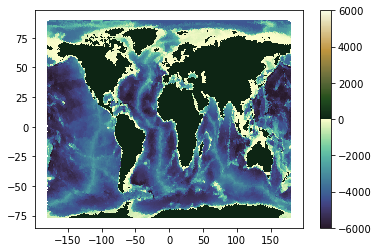

# 